# World Happiness Brazilian Report Analysis

## Importing data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Reading the data

In [8]:
# Reading excel files individually
whr_2020 = pd.read_excel("data/WHR20_Data.xlsx")
whr_2021 = pd.read_excel("data/WHR21_Data.xlsx")
whr_2022 = pd.read_excel("data/WHR22_Data.xlsx")
whr_2023 = pd.read_excel("data/WHR23_Data.xlsx")
whr_2024 = pd.read_excel("data/WHR24_Data.xlsx")

# Filtering Brazil only
whr_2020 = whr_2020[whr_2020['Country name'] == 'Brazil']
whr_2021 = whr_2021[whr_2021['Country name'] == 'Brazil']
whr_2022 = whr_2022[whr_2022['Country'] == 'Brazil']
whr_2023 = whr_2023[whr_2023['Country name'] == 'Brazil']
whr_2024 = whr_2024[whr_2024['Country name'] == 'Brazil']

# Columns don't match!
print("2020 columns: " + str(list(whr_2020.columns)))
print("2021 columns: " + str(list(whr_2021.columns)))
print("2022 columns: " + str(list(whr_2022.columns)))
print("2023 columns: " + str(list(whr_2023.columns)))
print("2024 columns: " + str(list(whr_2024.columns)))

2020 columns: ['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']
2021 columns: ['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to 

## Cleaning data

In [9]:
desired_column_names = [
    "Country",
    "Score",
    "Dystopia + residual",
    "Explained by: GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption"
]

In [10]:
# Mapping for original column names by year type
column_mappings = {
    "old": {  # 2020, 2021, 2023-2024
        'Country name': desired_column_names[0],
        'Ladder score': desired_column_names[1],
        'Dystopia + residual': desired_column_names[2],
        'Explained by: Log GDP per capita': desired_column_names[3],
        'Explained by: Social support': desired_column_names[4],
        'Explained by: Healthy life expectancy': desired_column_names[5],
        'Explained by: Freedom to make life choices': desired_column_names[6],
        'Explained by: Generosity': desired_column_names[7],
        'Explained by: Perceptions of corruption': desired_column_names[8]
    },
    "new": {  # 2022
        'Country': desired_column_names[0],
        'Happiness score': desired_column_names[1],
        'Dystopia (1.83) + residual': desired_column_names[2],
        'Explained by: GDP per capita': desired_column_names[3],
        'Explained by: Social support': desired_column_names[4],
        'Explained by: Healthy life expectancy': desired_column_names[5],
        'Explained by: Freedom to make life choices': desired_column_names[6],
        'Explained by: Generosity': desired_column_names[7],
        'Explained by: Perceptions of corruption': desired_column_names[8]
    }
}

def standardize_whr(df, year):
    if year == 2022:
        mapping = column_mappings["new"]
    else:
        mapping = column_mappings["old"]
    return df[list(mapping.keys())].rename(columns=mapping)

# Apply to each year
whr_2020 = standardize_whr(whr_2020, 2020)
whr_2021 = standardize_whr(whr_2021, 2021)
whr_2022 = standardize_whr(whr_2022, 2022)
whr_2023 = standardize_whr(whr_2023, 2023)
whr_2024 = standardize_whr(whr_2024, 2024)

whr_2020['year'] = 2020
whr_2021['year'] = 2021
whr_2022['year'] = 2022
whr_2023['year'] = 2023
whr_2024['year'] = 2024

In [11]:
# Joining data through pd.concat().
# I want to ignore previous indexes so I have one "true" index so it doesn't get confusing (ignore_index=True)
# Also I want to have matching columns from all the years data, some years have more columns than others (join='inner')
source_data = pd.concat([
        whr_2020, 
        whr_2021, 
        whr_2022, 
        whr_2023, 
        whr_2024
    ], ignore_index=True, join='inner'
)

source_data

,Country,Score,Dystopia + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,year
0,Brazil,6.3756,2.571860,0.952680,1.363464,0.766119,0.483293,0.131675,0.106519,2020
1,Brazil,6.3301,3.014908,1.027845,0.943968,0.570779,0.514314,0.141626,0.116669,2021
2,Brazil,6.2928,2.360507,1.461886,1.044197,0.614587,0.546346,0.131041,0.134278,2022
3,Brazil,6.1246,2.205470,1.454481,1.250219,0.387407,0.558488,0.131404,0.137097,2023
4,Brazil,6.2720,2.068074,1.429526,1.268778,0.547910,0.685224,0.130039,0.142451,2024


In [15]:
source_data_pivoted = (
    source_data
    .melt(
        id_vars=[
            'Country',
            'year'
        ],
        var_name='Variable',
        value_name='Value'
    )
)

source_data_pivoted

,Country,year,Variable,Value
0,Brazil,2020,Score,6.375600
1,Brazil,2021,Score,6.330100
2,Brazil,2022,Score,6.292800
3,Brazil,2023,Score,6.124600
4,Brazil,2024,Score,6.272000
5,Brazil,2020,Dystopia + residual,2.571860
6,Brazil,2021,Dystopia + residual,3.014908
7,Brazil,2022,Dystopia + residual,2.360507
8,Brazil,2023,Dystopia + residual,2.205470
9,Brazil,2024,Dystopia + residual,2.068074


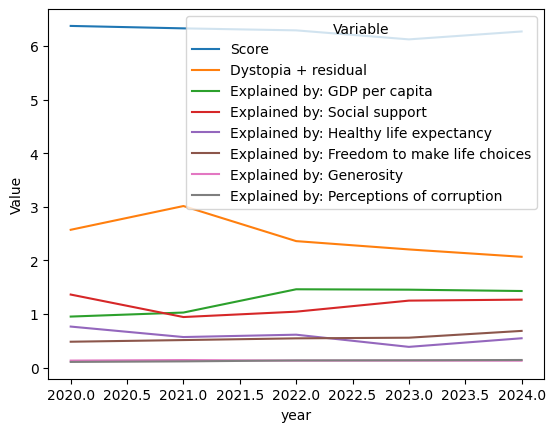

In [17]:
sns.lineplot(data=source_data_pivoted, x='year', y='Value', hue='Variable')
plt.show()